In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [25]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

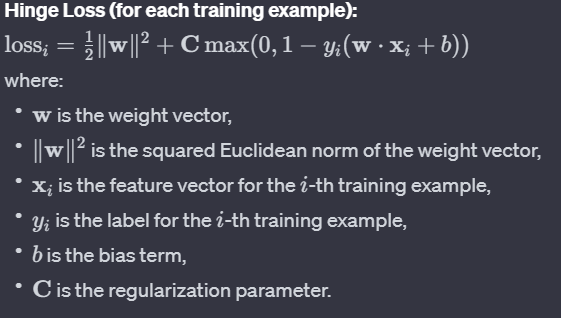

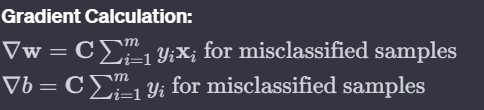

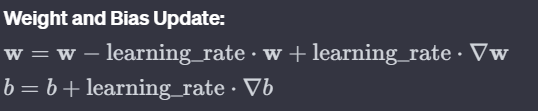

In [35]:
class svm:
    def __init__(self, C=1.0):
        self.C = C
        self.w = None
        self.b = None
        
        
    def hinge_loss(self, w, b, x, y):
        reg = (1/2) * np.dot(w, w)
        out = y * (np.dot(w, x) + b)
        return reg + self.C * np.maximum(0, 1 - out)
    
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        num_features, num_samples = X.shape[1], X.shape[0]
        self.w, self.b = np.zeros(num_features), 0

        for _ in range(epochs):
            for batch_initial in range(0, num_samples, batch_size):
                gradw, gradb = 0, 0

                for j in range(batch_initial, batch_initial + batch_size):
                    if j < num_samples:
                        xi, yi = X[j], Y[j]
                        ti = yi * (np.dot(self.w, xi) + self.b)
                        gradw += self.C * yi * xi * (ti <= 1)
                        gradb += self.C * yi * (ti <= 1)

                self.w -= learning_rate * self.w + learning_rate * gradw
                self.b += learning_rate * gradb

        return self

    
    def predict(self,x):
        return np.sign(np.dot(x, self.w) + self.b)

In [36]:
model = svm()
model.fit(x_train,y_train)
pred = model.predict(x_test)

In [37]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, pred)
print("Accuracy of SVM is :", accuracy*100)

Accuracy of SVM is : 35.0


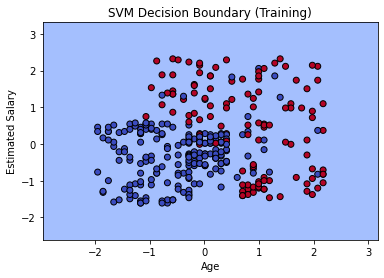

In [40]:
def plot_decision_boundary(model, X, y):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.title('SVM Decision Boundary (Training)')
    plt.show()

# Plotting the decision boundary
plot_decision_boundary(model, x_train, y_train)

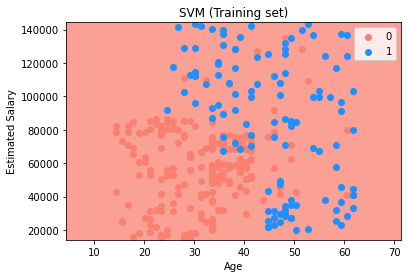

In [32]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 1),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], color = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

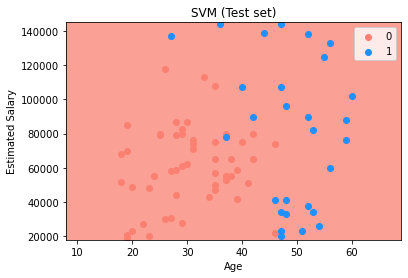

In [41]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 10, stop = x_set[:, 0].max() + 10, step = 1),
                     np.arange(start = x_set[:, 1].min() - 1000, stop = x_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, model.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], color = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()